In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Creating D: 1,00,000 points uniformly distributed between 0.01 and 1000
D = np.linspace(0.01, 1000, 100000)

# Displaying first 10 and last 10 values for reference
print("First 10 values of D:", D[:10])
print("Last 10 values of D:", D[-10:])


First 10 values of D: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Last 10 values of D: [ 999.91  999.92  999.93  999.94  999.95  999.96  999.97  999.98  999.99
 1000.  ]


a. Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [22]:
n = 100000

In [23]:
def mean():
    a = 0.01
    l = 1000
    sum_D = (n / 2) * (a + l)
    mean_D = sum_D / n
    return mean_D

In [24]:
mean_D = mean()
mean_D

500.005

In [25]:
# Verification from inbuilt library
np.mean(D)

500.005

In [26]:
def sum_val(D,mean_D):
    diff_D = 0
    for value in D:
        diff_D += (value-mean_D)**2
    return diff_D

In [27]:
def variance(mean_D):
    result_diff_D = sum_val(D,mean_D)
    var_D = result_diff_D / n
    return var_D

In [28]:
var_D = variance(mean_D)
var_D

83333.333325

In [29]:
# Verifying from inbuilt library
np.var(D)

83333.33332500001

b. Use sampling with replacement, to randomly sample 50 points {y1, . . . ,y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1 square, s2 square, s3 square.

In [30]:
def _mean(sampled_points):
    sum_sample = 0
    for i in sampled_points:
        sum_sample += i 
    return sum_sample / 50

def mean_square(sampled_points):
    mean_values = _mean(sampled_points)
    return sum_val(sampled_points,mean_values)

def get_s1(sampled_points):
    return mean_square(sampled_points) / 51

def get_s2(sampled_points):
    return mean_square(sampled_points) / 50

def get_s3(sampled_points):
    return mean_square(sampled_points) / 49

def samples_s1_s2_s3(D):
    sampled_points = np.random.choice(D, 50, replace=True)
    s1 = get_s1(sampled_points)
    s2 = get_s2(sampled_points)
    s3 = get_s3(sampled_points)
    return s1,s2,s3

In [31]:
s1, s2, s3 = samples_s1_s2_s3(D)
print("s1 square:"  , s1)
print("s2 square:", s2)
print("s3 square:", s3)

s1 square: 90931.38866494119
s2 square: 92750.01643824001
s3 square: 94642.87391657145


c. Repeat (b) for multiple iterations and maintain the average scores, i.e., Avgs1 square, Avgs2 square and Avgs3 square.

In [32]:
def get_average_scores(num_iterations):
    avg1 = []
    avg2 = []
    avg3 = []
    curr_avg1 = 0
    curr_avg2 = 0
    curr_avg3 = 0
    for i in range(1,num_iterations+1):
        if (i == 1):
            curr_avg1, curr_avg2, curr_avg3 = samples_s1_s2_s3(D)
        else:
            s1, s2, s3 = samples_s1_s2_s3(D)
            curr_avg1 = (curr_avg1 * (i - 1) + s1) / i
            curr_avg2 = (curr_avg2 * (i - 1) + s2) / i
            curr_avg3 = (curr_avg3 * (i - 1) + s3) / i
        avg1.append(curr_avg1)
        avg2.append(curr_avg2)
        avg3.append(curr_avg3)
    return avg1, avg2, avg3

In [33]:
avg1, avg2, avg3 = get_average_scores(10)
print("For 10 iterations:")
print("Average s1 square scores for each iteration:\n", avg1)
print("Average s2 square scores for each iteration:\n", avg2)
print("Average s3 square scores for each iteration:\n", avg3)

For 10 iterations:
Average s1 square scores for each iteration:
 [76550.57763984313, 78943.61426323527, 75933.60947227449, 79353.019012049, 81051.98574168627, 81525.15275483658, 80864.54201030251, 80871.71647175979, 78972.71439233114, 78898.17393601566]
Average s2 square scores for each iteration:
 [78081.58919263999, 80522.48654849998, 77452.28166171997, 80940.07939228998, 82673.02545651999, 83155.65580993332, 82481.83285050855, 82489.15080119499, 80552.16868017777, 80476.137414736]
Average s3 square scores for each iteration:
 [79675.09101289794, 82165.80260051019, 79032.94047114284, 82591.91774723468, 84360.23005767346, 84852.71001013606, 84165.13556174343, 84172.60285836224, 82196.09048997733, 82118.50756605715]


d. Use three different scatter plots to visualize the change in Avgsi square, for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

Here, we test it for 10 iterations. We test the scatter plots with increasing iterations in the e part.

In [34]:
def plot_scatter(avg, iterations, heading):
    iterations = range(1, len(avg) + 1)

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(iterations, avg, color='blue', marker='o')
    plt.axhline(y=var_D, color='red', linestyle='--', label=f'Variance = {var_D:.2f}')

    # Add labels and title
    plt.xlabel('Iterations')
    plt.ylabel(f'{heading} Values')
    plt.title(f'Change in {heading} over Iterations')

    # Display the plot
    plt.grid(True)
    plt.savefig(f'./plots/{heading}')
    plt.show()

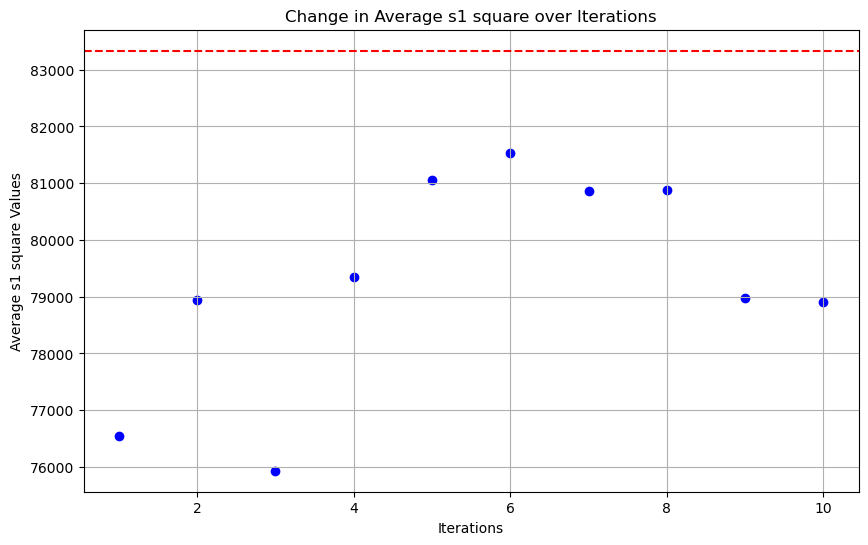

In [35]:
plot_scatter(avg1, 10, "Average s1 square")

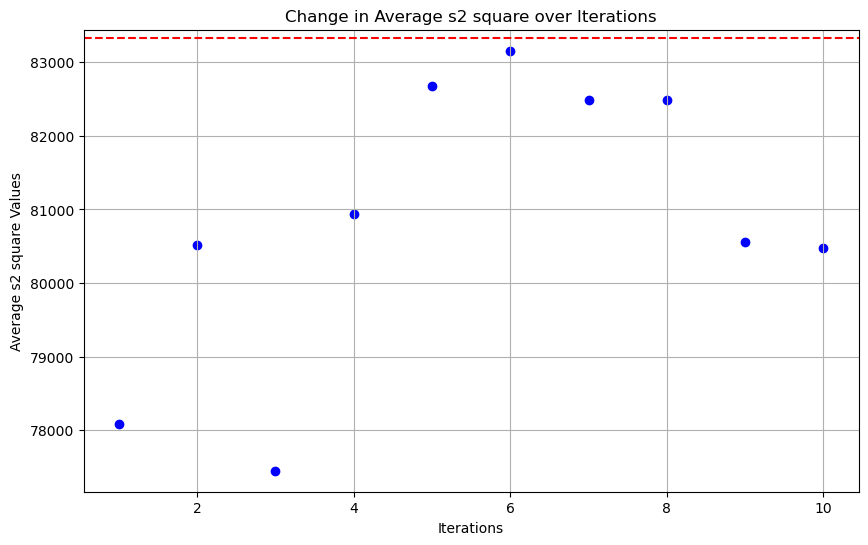

In [36]:
plot_scatter(avg2, 10, "Average s2 square")

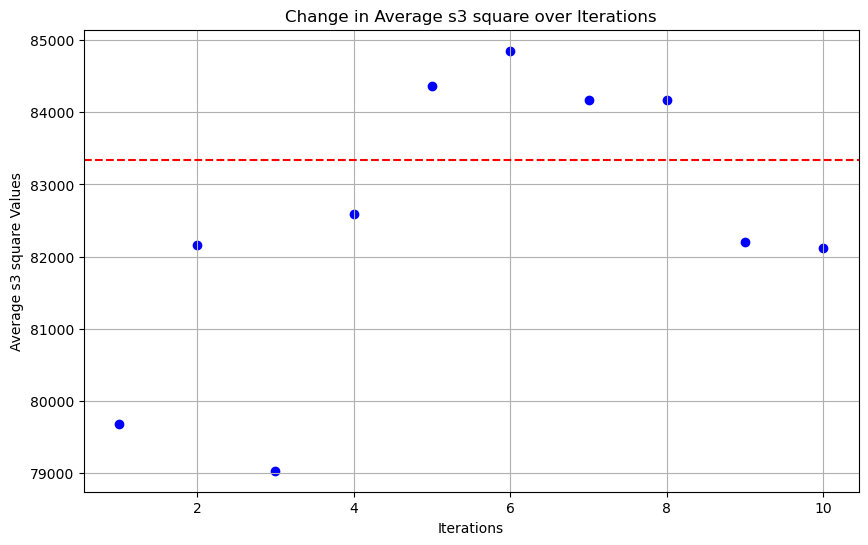

In [37]:
plot_scatter(avg3, 10, "Average s3 square")

e. Repeat (b), (c) & (d) multiple times and notice among Avgs1 square, Avgs2 square and Avgs3 square which score approaches to the true variance much quickly or frequently. Argue its reason.

For 1000 iterations:


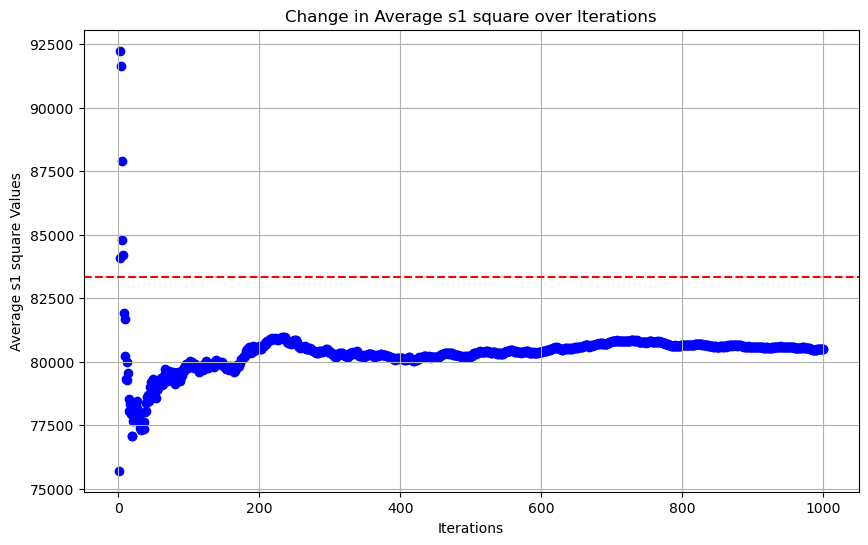

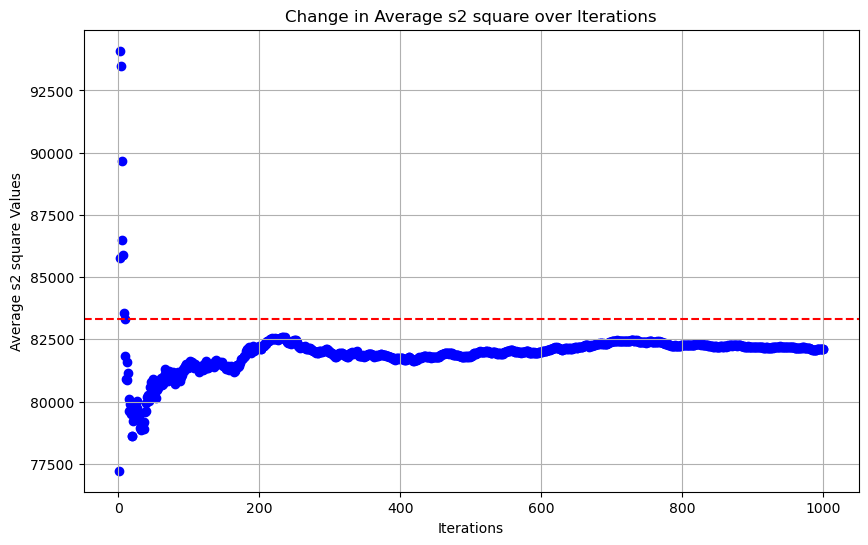

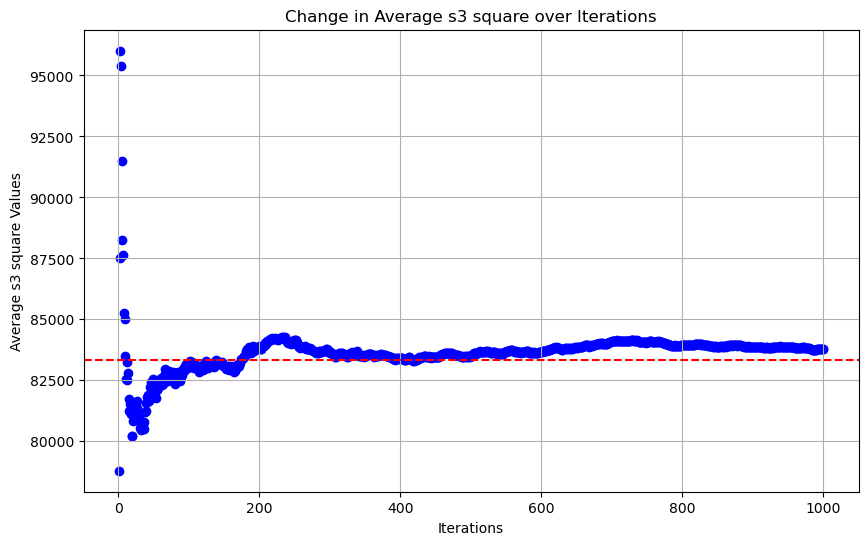

For 10000 iterations:


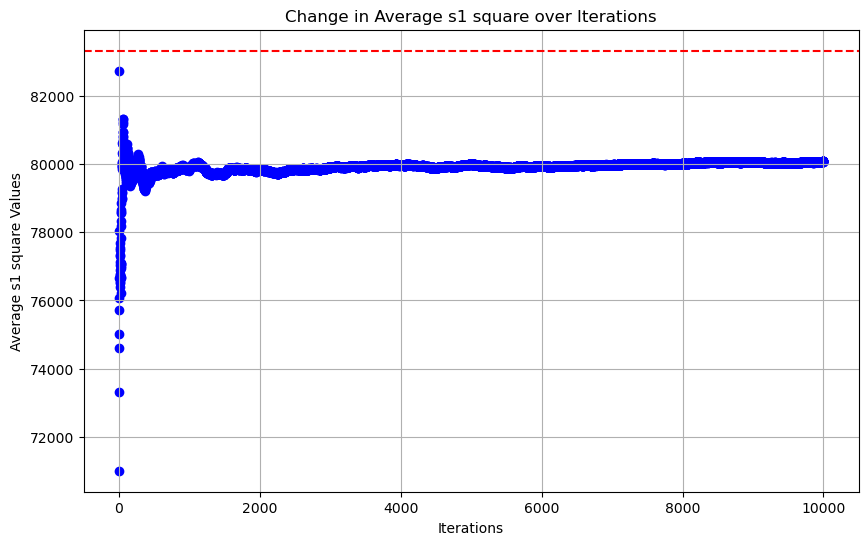

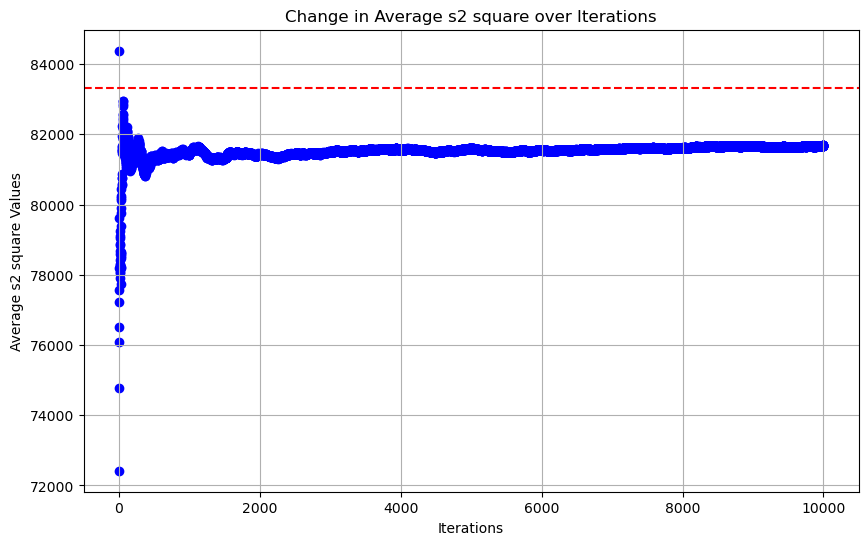

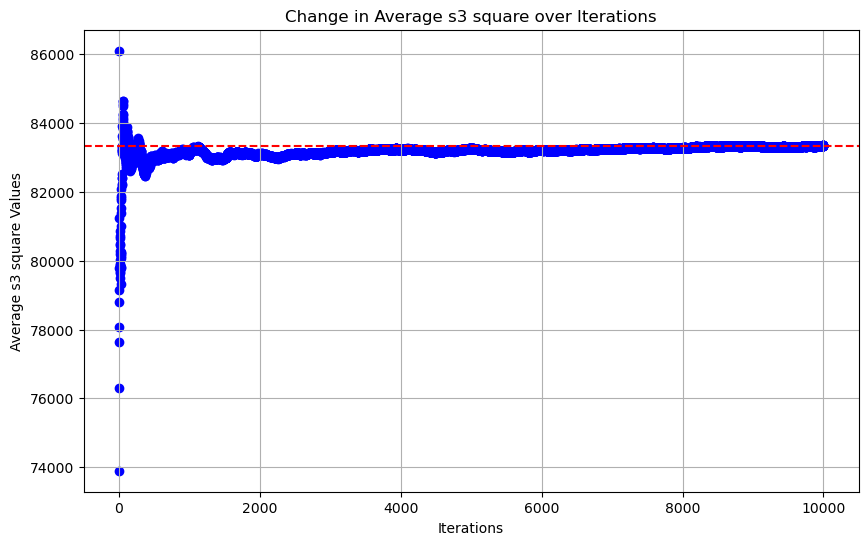

For 100000 iterations:


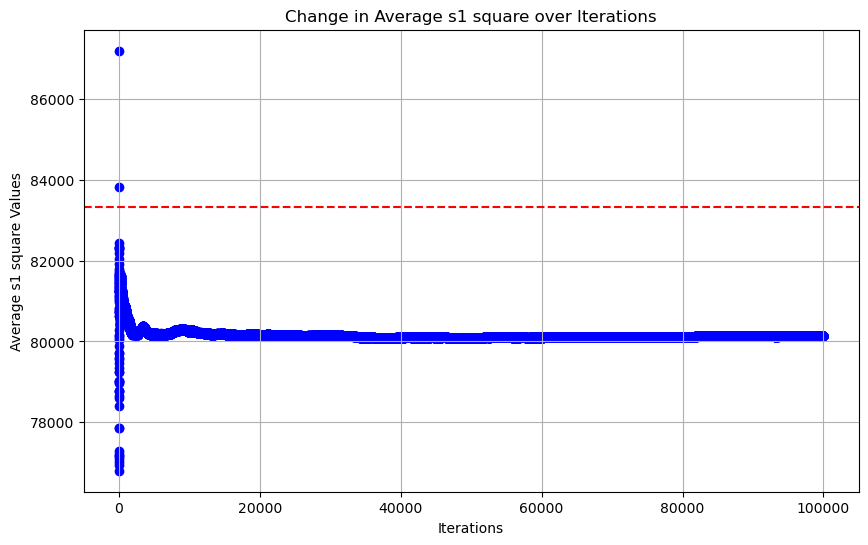

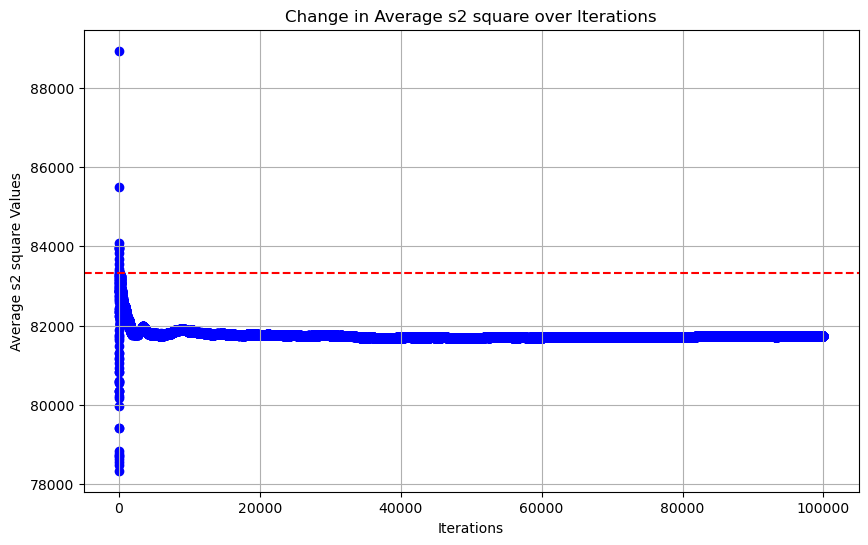

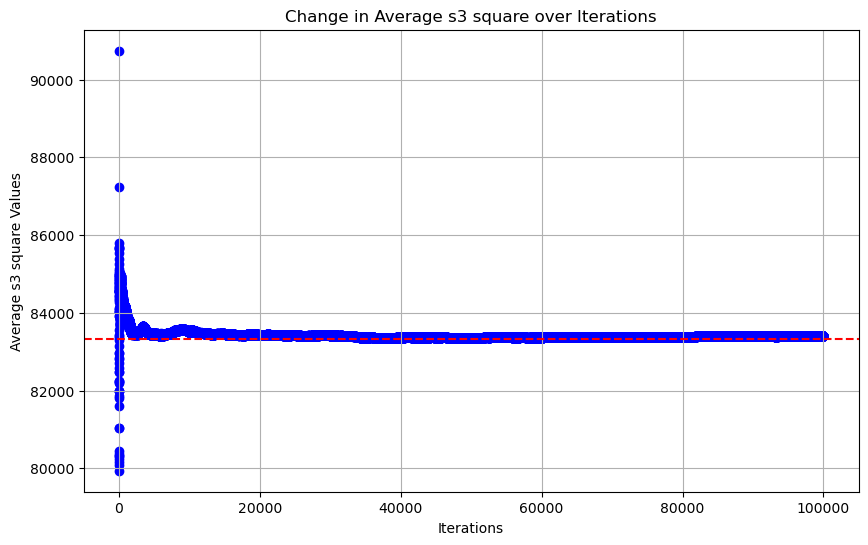

In [38]:
iterations = 1000
while iterations <= 100000:
    avg1, avg2, avg3 = get_average_scores(iterations)
    print(f"For {iterations} iterations:")
    plot_scatter(avg1, iterations, "Average s1 square")
    plot_scatter(avg2, iterations, "Average s2 square")
    plot_scatter(avg3, iterations, "Average s3 square")
    iterations *= 10

We notice that as we increase the number of iterations, the graph of average s3 square converges to the variance of the dataset more quickly. <br>

<b>Justification:</b>  Dividing the mean square difference by n-1 is called Bessel's correction, which gives us sample variance. It is used to get an unbiased estimate of the population variance. The sample variance is given by the formula: s^2 = (1/(n-1)) * Σ (xi - x̄)^2. The sample variance is an unbiased  estimator of the population variance. Hence, it converges to the population variance. Its proof is stated in the reference stated below.

<b>Reference: </b>

1. https://web.ma.utexas.edu/users/mks/M358KInstr/SampleSDPf.pdf
               
2. https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation


